In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.7 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-i7li95xd
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-i7li95xd
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=0c0f2403537f883ae33acc857386ffbea8a050ed6963ca8a53ad2aaf7d92cad3
  Stored in directory: /tmp/pip-ephem-wheel-cache-lus7rp5v/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [ ]:
import clip
import torch
from PIL import Image
import torch.nn.functional as F
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
model.eval()


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [ ]:
from PIL import Image, ImageOps

def get_image_embedding(img_path):
    image = preprocess(Image.open(img_path).convert("RGB")).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = model.encode_image(image)
        embedding = embedding / embedding.norm(dim=-1, keepdim=True)  # 정규화
    return embedding.cpu()

def load_image(img_path):
    img = Image.open(img_path).convert("RGB")
    img = ImageOps.exif_transpose(img)
    return img


def vis_sim(img_path_1, img_path_2, title_1="Image A", title_2="Image B"):
    # 이미지 로드
    img1 = load_image(img_path_1)
    img2 = load_image(img_path_2)

    # 임베딩
    emb1 = get_image_embedding(img_path_1)
    emb2 = get_image_embedding(img_path_2)

    # similarity
    sim = F.cosine_similarity(emb1, emb2).item()

    # 시각화
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.axis("off")
    plt.title(title_1)

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.axis("off")
    plt.title(title_2)

    plt.suptitle(f"Cosine Similarity: {sim:.4f}", fontsize=14)
    plt.tight_layout()
    plt.show()

    return sim


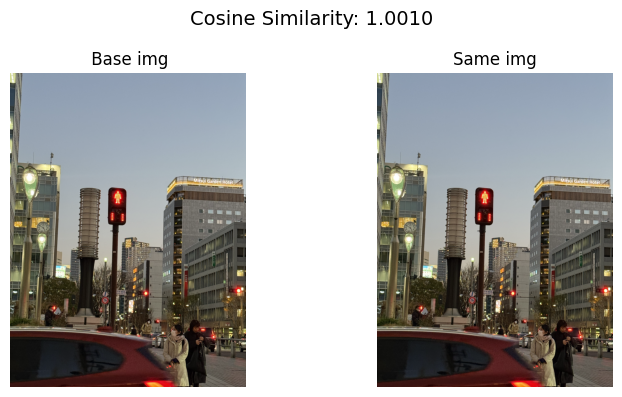

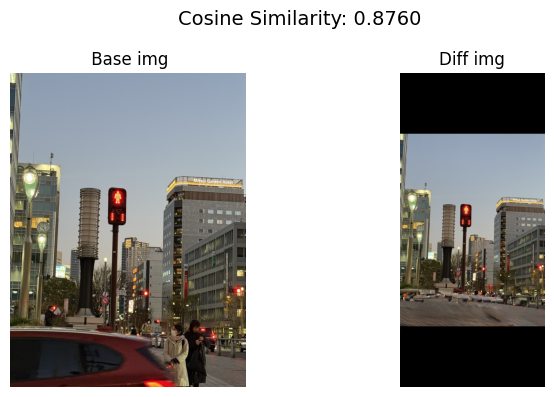

0.8759765625

In [ ]:
base_img = "/content/drive/MyDrive/imgset/dt_001.png"
same_img = "/content/drive/MyDrive/imgset/dt_002.png"
diff_img = "/content/drive/MyDrive/imgset/dt_004.jpg"


vis_sim(base_img, same_img," Base img","Same img")
vis_sim(base_img, diff_img," Base img","Diff img")